In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [35]:
# /Users/HenryYu/Google Drive/Data Analyst Nanocourse/Loan Prediction
print(os.getcwd())
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')

X_test = pd.read_csv('X_test.csv')
Y_test = pd.read_csv('Y_test.csv')

/Users/HenryYu/Google Drive/Data Analyst Nanocourse/Loan Prediction


In [36]:
print(X_train.head())


    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a8ec8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ab1d550>]], dtype=object)

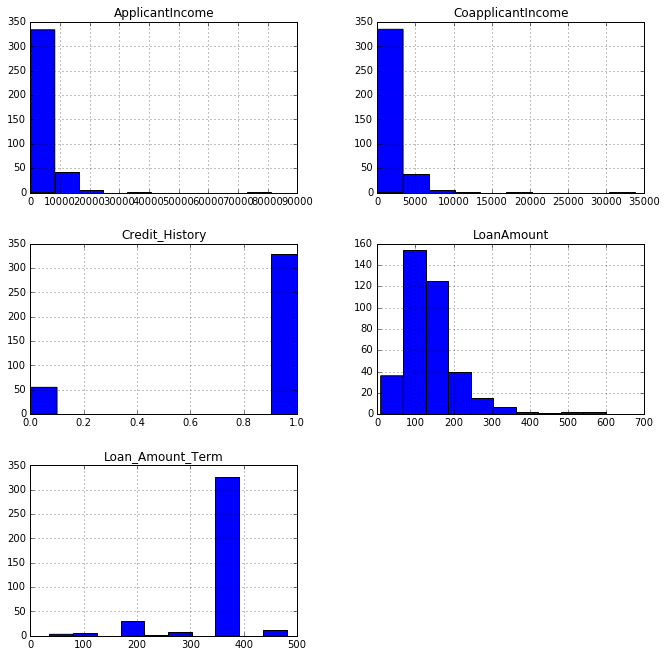

In [37]:
# This is feature scaling, which limits the amount of continuous variables
#plot distribution of all continious variables 
X_train[X_train.dtypes[(X_train.dtypes == 'int64')| (X_train.dtypes == 'float64')].index.values].hist(figsize = [11, 11])

# X_train['somecodehere'].hist(flag of size)

## K nearest neighbours 

K- nearest neighbours is an algorithm that is built into many classification and regression models. These are 


In [38]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [39]:
print(X_train.Education.unique())

['Graduate' 'Not Graduate']


In [42]:
#find the number of missing values in LoanAmount 

(X_train.isnull().sum()).LoanAmount

0

In [56]:
(X_train.loc[(X_train.Gender == 'male') & (X_train.Married == 'yes')].shape[1] / float(X_train.shape[0]))*100


3.125

In [156]:
print(X_train.Gender == 'Male').sum()
print(X_train.Married == 'Yes').sum()

318
250


In [89]:
(X_train.loc[(X_train.Gender == 'Male') & (X_train.Married == 'Yes')]).shape[0] / float(X_train.shape[0]) * 100

59.635416666666664

In [164]:
# use the female to try the str.find function 
# use ==False to find if it is a part of the string 
# use < 0 to find if it is NOT part of the string 
(X_train.Gender.str.find('Fe') == False).sum()
(X_train.Gender.str.find('Fe') < 0 ).sum()

318

In [91]:
print(X_test.head())
print(X_train.head())

    Loan_ID  Gender Married Dependents     Education Self_Employed  \
0  LP002684  Female      No          0  Not Graduate            No   
1  LP001907    Male     Yes          0      Graduate            No   
2  LP001205    Male     Yes          0      Graduate            No   
3  LP001275    Male     Yes          1      Graduate            No   
4  LP002455    Male     Yes          2      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3400                  0          95               360   
1            14583                  0         436               360   
2             2500               3796         120               360   
3             3988                  0          50               240   
4             3859                  0          96               360   

   Credit_History Property_Area  
0               1         Rural  
1               1     Semiurban  
2               1         Urban  
3               

In [92]:
set(X_test.columns).difference(set(X_train.columns))

set()

In [93]:
X_train1 = X_train

In [99]:

del(X_train1['LoanAmount'])


In [100]:
X_train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,360,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,480,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,180,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,360,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,360,Urban


In [101]:
set(X_test.columns).difference(set(X_train1.columns))

{'Credit_History', 'LoanAmount'}

In [102]:
set(X_test.columns.tolist()) - set(X_train1.columns.tolist())

{'Credit_History', 'LoanAmount'}

In [191]:
X_train['Gender Percentage'] = X_train.Gender.map(X_train.Gender.value_counts()/X_train.shape[0])

In [192]:
print X_train['Gender Percentage']
print X_train.Gender

0      0.828125
1      0.828125
2      0.828125
3      0.828125
4      0.828125
5      0.828125
6      0.828125
7      0.828125
8      0.828125
9      0.828125
10     0.828125
11     0.828125
12     0.828125
13     0.828125
14     0.171875
15     0.828125
16     0.828125
17     0.828125
18     0.828125
19     0.828125
20     0.828125
21     0.828125
22     0.828125
23     0.171875
24     0.171875
25     0.828125
26     0.171875
27     0.828125
28     0.828125
29     0.828125
         ...   
354    0.828125
355    0.828125
356    0.171875
357    0.828125
358    0.828125
359    0.828125
360    0.828125
361    0.828125
362    0.828125
363    0.828125
364    0.171875
365    0.828125
366    0.171875
367    0.828125
368    0.828125
369    0.828125
370    0.828125
371    0.828125
372    0.828125
373    0.828125
374    0.828125
375    0.171875
376    0.828125
377    0.828125
378    0.828125
379    0.828125
380    0.828125
381    0.828125
382    0.828125
383    0.828125
Name: Gender Percentage,

In [195]:
X_train.shape[1]

11

In [197]:
pd.datetime.now()

datetime.datetime(2016, 12, 29, 16, 57, 28, 639154)

In [114]:
X_train1.Gender

0        Male
1        Male
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8        Male
9        Male
10       Male
11       Male
12       Male
13       Male
14     Female
15       Male
16       Male
17       Male
18       Male
19       Male
20       Male
21       Male
22       Male
23     Female
24     Female
25       Male
26     Female
27       Male
28       Male
29       Male
        ...  
354      Male
355      Male
356    Female
357      Male
358      Male
359      Male
360      Male
361      Male
362      Male
363      Male
364    Female
365      Male
366    Female
367      Male
368      Male
369      Male
370      Male
371      Male
372      Male
373      Male
374      Male
375    Female
376      Male
377      Male
378      Male
379      Male
380      Male
381      Male
382      Male
383      Male
Name: Gender, dtype: object

In [120]:
# this is a new dataframe, to practice DROP, APPLY and MAP 

data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}

df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
print df

            coverage   name  reports  year
Cochice           25  Jason        4  2012
Pima              94  Molly       24  2012
Santa Cruz        57   Tina       31  2013
Maricopa          62   Jake        2  2014
Yuma              70    Amy        3  2014


In [127]:
# to apply / map a function to a dataframe or a row / column, you have to use the lambda method 
capital = lambda x : x.upper()
cap = df['name'].apply(capital)
print cap
print df

Cochice       JASON
Pima          MOLLY
Santa Cruz     TINA
Maricopa       JAKE
Yuma            AMY
Name: name, dtype: object
            coverage   name  reports  year
Cochice           25  Jason        4  2012
Pima              94  Molly       24  2012
Santa Cruz        57   Tina       31  2013
Maricopa          62   Jake        2  2014
Yuma              70    Amy        3  2014


In [129]:
df['name'].map(capital)
# you can make it perminant by assigning the new dataframe in the old dataframe 

            coverage   name  reports  year
Cochice           25  Jason        4  2012
Pima              94  Molly       24  2012
Santa Cruz        57   Tina       31  2013
Maricopa          62   Jake        2  2014
Yuma              70    Amy        3  2014


In [140]:
# drop name, apply square root function over the dataframe 
# The drop function is not permenant, it creates a new dataframe, doesn't change the old one
df1= df.drop( 'name', axis = 1)
df2 = df1.applymap(np.sqrt)
print df2

            coverage   reports       year
Cochice     5.000000  2.000000  44.855323
Pima        9.695360  4.898979  44.855323
Santa Cruz  7.549834  5.567764  44.866469
Maricopa    7.874008  1.414214  44.877611
Yuma        8.366600  1.732051  44.877611


In [141]:
def times100(x):
    # that, if x is a string,
    if type(x) is str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 100
    elif x:
        return 100 * x
    # and leave everything else
    else:
        return

In [142]:
df.applymap(times100)

,coverage,name,reports,year
Cochice,2500,Jason,400,201200
Pima,9400,Molly,2400,201200
Santa Cruz,5700,Tina,3100,201300
Maricopa,6200,Jake,200,201400
Yuma,7000,Amy,300,201400


In [144]:
df3 = df.groupby('year')
print df3

In [148]:
df3.sum()

,coverage,reports
year,,
2012,119,28
2013,57,31
2014,132,5


In [166]:
 data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70],
        'cabin': [4, 2, NaN, NaN, NaN]}

In [167]:
df4 = pd.DataFrame(data)

In [168]:
print df4

   cabin  coverage   name  reports  year
0    4.0        25  Jason        4  2012
1    2.0        94  Molly       24  2012
2    NaN        57   Tina       31  2013
3    NaN        62   Jake        2  2014
4    NaN        70    Amy        3  2014


In [176]:
df4['Missing Cabin'] = df4.cabin.isnull().astype(int)

In [177]:
print df4


   cabin  coverage   name  reports  year  Missing Cabin
0    4.0        25  Jason        4  2012              0
1    2.0        94  Molly       24  2012              0
2    NaN        57   Tina       31  2013              1
3    NaN        62   Jake        2  2014              1
4    NaN        70    Amy        3  2014              1


SyntaxError: invalid syntax (<ipython-input-181-c042c905b201>, line 1)